# Global Terrorism Dataset

In this dataset, we explored some data on terrorism, which is re-emerging as a hot topic due to the recent developments around the world, as well as due to the ongoing Russia-Ukraine War. According to Britannica, terrorism's goal is to "destroy the public's sense of security in the places most familiar to them". Inciting fear among those that we live with and using individual personal ideologies against each other.

In order to better understand the why behind terrorism, we made use of EDA tools to help us analyse the key triggers of such attacks.

This is a huge dataset which consists of over 200,000 terrorist attacks that occurred all around the world from 1970 to 2017. Only consisting of those attacks that have been planned and executed. This database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquarted at the Univeristy of Maryland.

More info on the Global Terrorism Database: https://www.start.umd.edu/gtd/access/

## Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Map stuff
import folium
from folium.plugins import MarkerCluster

# Misc
from collections import Counter
sns.set()
%matplotlib inline

In [8]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

/Users/mel_ng/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [11]:
mapData=df.loc[:,'city':'longitude']
mapData=mapData.dropna().values.tolist()

map_locations = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map_locations)
for point in range(0, len(mapData)):
    folium.Marker(location=[mapData[point][1],mapData[point][2]],
                  popup = mapData[point][0]).add_to(markerCluster)

In [12]:
map_locations

### Countries that were attacked the most

In [13]:
attack_count = df.country_txt.value_counts()[:15].reset_index()
attack_count.columns = ["Country Name", "Total Attacks"]
px.bar(data_frame=attack_count, x="Country Name", y="Total Attacks", color="Country Name", width=1000, height=600)

### Yearly Count of Terrorist Attack

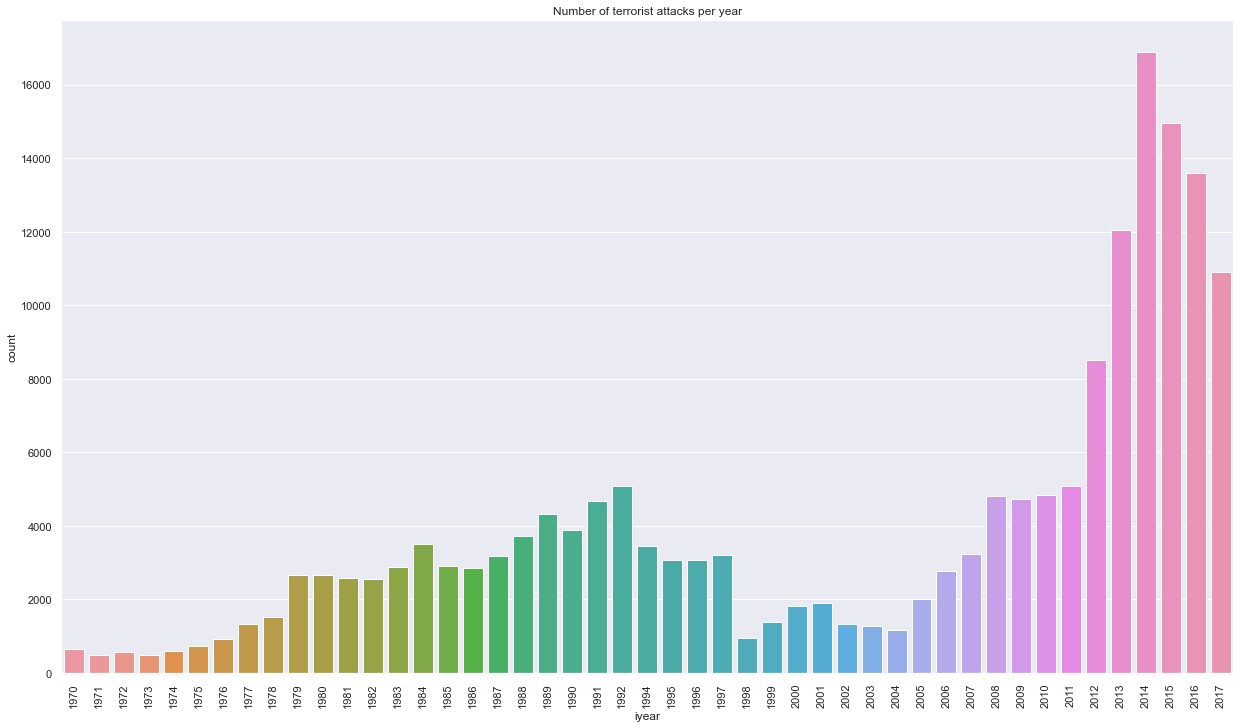

In [15]:
plt.figure(figsize=(21, 12))
sns.countplot(x="iyear", data=df)
plt.xticks(rotation=90)
plt.title("Number of terrorist attacks per year")
plt.show()

<b>Observation</b>
Over here we saw a huge spike in the number of terrorist attacks from 2011 onwards. With the year 2015 having nearly 17000 reported terrorist attacks.

### Yearly Casualties due to terrorist attacks

In [16]:
df['casualties'] = df['nkill'] + df['nwound']
casualties_by_year = df.groupby('iyear')['casualties'].sum().to_frame().reset_index()
casualties_by_year.columns = ['Year', 'Casualty Count']
px.bar(data_frame=casualties_by_year, x='Year', y='Casualty Count', width=1000, height=600) 

<b>Observation</b>
1993 is empty - were there really no terrorist attacks in 1993?

Unfortunately, this is not true: https://en.wikipedia.org/wiki/List_of_terrorist_incidents_in_1993

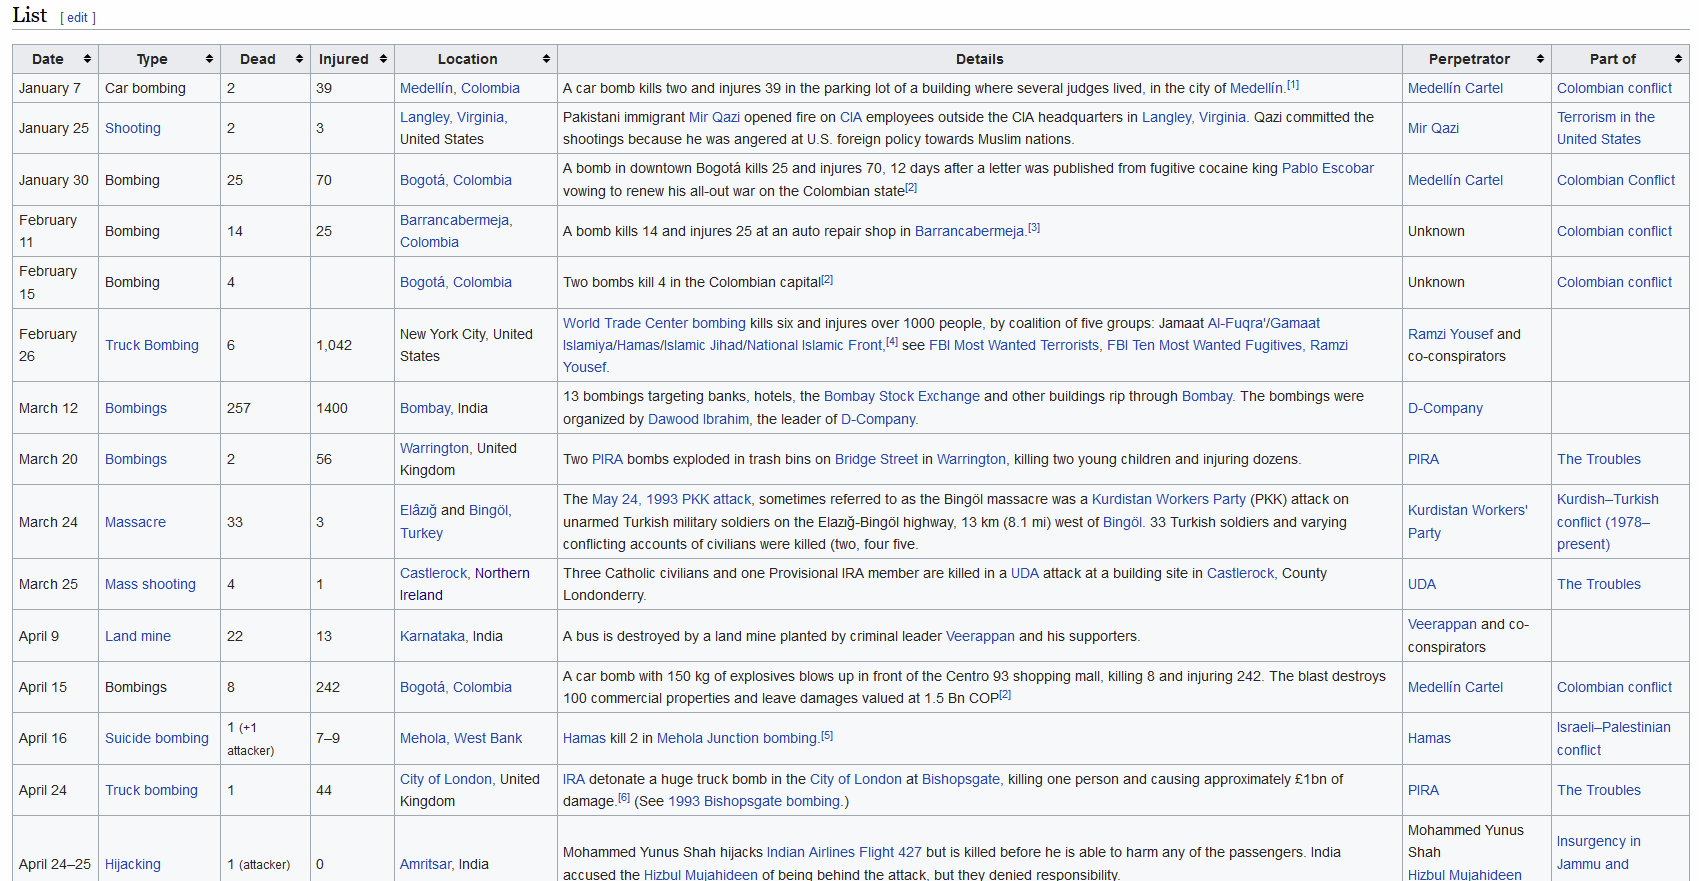

It appears that there were terrorist attacks in 1993 - and this was not accounted for in the dataset.

We should take note of this and use this information in the future.

<Update>
We did a little more digging and it turns out that on the site, there is a separate dataset for the year 1993. Although there was no mention of why it was separated like so. We combined both of the dataset to make it a more complete one.

In [25]:
dftemp = pd.read_csv("gtd1993_0221dist.csv")
df = pd.concat([df,dftemp])

In [26]:
df['casualties'] = df['nkill'] + df['nwound']
casualties_by_year = df.groupby('iyear')['casualties'].sum().to_frame().reset_index()
casualties_by_year.columns = ['Year', 'Casualty Count']
px.bar(data_frame=casualties_by_year, x='Year', y='Casualty Count', width=1000, height=600) 

<b>Observation</b>
After adding in the 1993 dataset, it's more complete dataset to work with.

### What are the most popular targets?

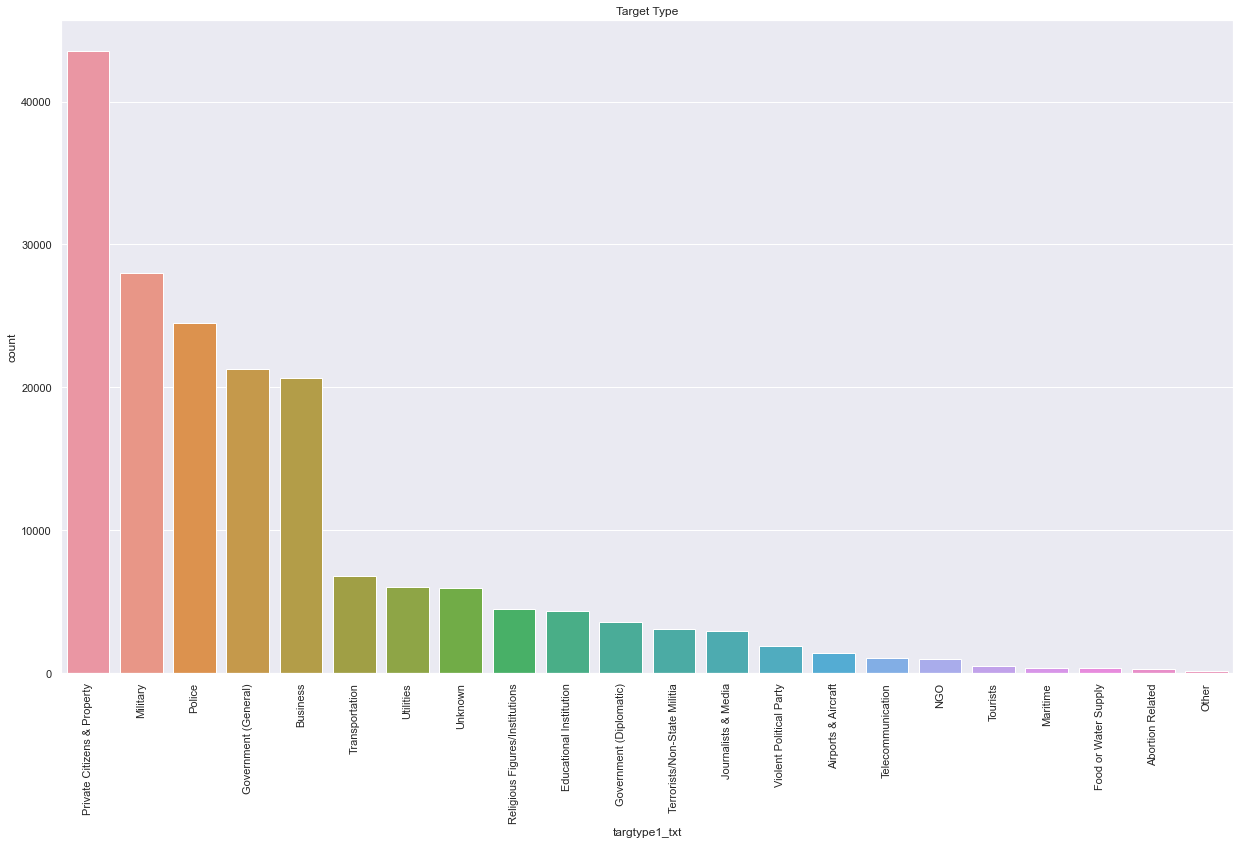

In [ ]:
plt.figure(figsize=(21, 12))
sns.countplot(x="targtype1_txt", data=df, order = df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Target Type")
plt.show()

# What makes a successful terrorist attack?

## Data preparation

The columns we need are:

- Country data + location
- Time
- Attack type
- Success rate
- Target victim information
- Perpetrator background
- Suicide
- And other variables needed

For the columns with multiple categories, (e.g. attack type 1 and 2, target type 1 and 2) we will only be analysing the main type. (labelled 1)

In [ ]:
df1 = df[[
    'iyear',
    'imonth',
    'iday',
    'city',
    'country_txt',
    'region_txt',
    'attacktype1_txt',
    'target1',
    'nkill',
    'nwound',
    'gname',
    'nperps',
    'targtype1_txt',
    'targsubtype1_txt',
    'natlty1_txt',
    'weaptype1_txt',
    'motive',
    'suicide',
    'success',
    'nkillter',
    'nwoundte',
    'ishostkid',
]]

In [ ]:
df1.isnull().sum()

iyear                    0
imonth                   0
iday                     0
city                   434
country_txt              0
region_txt               0
attacktype1_txt          0
target1                636
nkill                10313
nwound               16311
gname                    0
nperps               71115
targtype1_txt            0
targsubtype1_txt     10373
natlty1_txt           1559
weaptype1_txt            0
motive              131130
suicide                  0
success                  0
nkillter             66958
nwoundte             69143
ishostkid              178
dtype: int64

From the above, it looks like the columns 'motive', 'nkillter', 'nwoundte', and 'nperps' have too many null values - and might hinder our data analysis. Therefore, we have decided to remove them as they are not extremely important to figure out what makes a successful terrorist attack.

In [ ]:
df1.isnull().sum()

iyear                    0
imonth                   0
iday                     0
city                   434
country_txt              0
region_txt               0
attacktype1_txt          0
target1                636
nkill                10313
nwound               16311
gname                    0
nperps               71115
targtype1_txt            0
targsubtype1_txt     10373
natlty1_txt           1559
weaptype1_txt            0
motive              131130
suicide                  0
success                  0
nkillter             66958
nwoundte             69143
ishostkid              178
dtype: int64

In [ ]:
df1.head(10)

,iyear,imonth,iday,city,country_txt,region_txt,attacktype1_txt,target1,nkill,nwound,...,targtype1_txt,targsubtype1_txt,natlty1_txt,weaptype1_txt,motive,suicide,success,nkillter,nwoundte,ishostkid
0,1970,7,2,Santo Domingo,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,...,Private Citizens & Property,Named Civilian,Dominican Republic,Unknown,NaN,0,1,NaN,NaN,0.0
1,1970,0,0,Mexico city,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,...,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,Unknown,NaN,0,1,NaN,NaN,1.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Assassination,Employee,1.0,0.0,...,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,0,1,NaN,NaN,0.0
3,1970,1,0,Athens,Greece,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,...,Government (Diplomatic),Embassy/Consulate,United States,Explosives,NaN,0,1,NaN,NaN,0.0
4,1970,1,0,Fukouka,Japan,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,...,Government (Diplomatic),Embassy/Consulate,United States,Incendiary,NaN,0,1,NaN,NaN,0.0
5,1970,1,1,Cairo,United States,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,...,Police,"Police Building (headquarters, station, school)",United States,Firearms,To protest the Cairo Illinois Police Deparment,0,1,0.0,0.0,0.0
6,1970,1,2,Montevideo,Uruguay,South America,Assassination,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0.0,...,Police,Police Security Forces/Officers,Uruguay,Firearms,NaN,0,0,NaN,NaN,0.0
7,1970,1,2,Oakland,United States,North America,Bombing/Explosion,Edes Substation,0.0,0.0,...,Utilities,Electricity,United States,Explosives,NaN,0,1,0.0,0.0,0.0
8,1970,1,2,Madison,United States,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,...,Military,Military Recruiting Station/Academy,United States,Incendiary,To protest the War in Vietnam and the draft,0,1,0.0,0.0,0.0
9,1970,1,3,Madison,United States,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,...,Government (General),Government Building/Facility/Office,United States,Incendiary,To protest the War in Vietnam and the draft,0,1,0.0,0.0,0.0


Additionally, based on first impression from the head() of the dataframe, gname and weaptype1 might be filled fully, but they might consist of a fair amount of unknowns.

In [ ]:
df1['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

In [ ]:
df1['weaptype1_txt'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

The weapon types have a reasonable number of unknowns, but the terrorist group name column has way too many unknowns to be useful. We might want to consider dropping this column as well.

In [ ]:
df1 = df1[[
    'iyear',
    'imonth',
    'iday',
    'city',
    'country_txt',
    'region_txt',
    'attacktype1_txt',
    'target1',
    'nkill',
    'nwound',
    # 'gname',
    # 'nperps',
    'targtype1_txt',
    'targsubtype1_txt',
    'natlty1_txt',
    'weaptype1_txt',
    # 'motive',
    'suicide',
    'success',
    # 'nkillter',
    # 'nwoundte',
    'ishostkid',
]]

In [ ]:
df1.shape

(181691, 17)

In [ ]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   city              181257 non-null  object 
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   attacktype1_txt   181691 non-null  object 
 7   target1           181055 non-null  object 
 8   nkill             171378 non-null  float64
 9   nwound            165380 non-null  float64
 10  targtype1_txt     181691 non-null  object 
 11  targsubtype1_txt  171318 non-null  object 
 12  natlty1_txt       180132 non-null  object 
 13  weaptype1_txt     181691 non-null  object 
 14  suicide           181691 non-null  int64  
 15  success           181691 non-null  int64  
 16  ishostkid         18

The number of null values and unknowns are reasonable, and would not make that much of an impact on our analysis were we to decide to drop them.

In [ ]:
df1.dropna(axis=0, inplace=True)

In [ ]:
df1.isnull().sum()

iyear               0
imonth              0
iday                0
city                0
country_txt         0
region_txt          0
attacktype1_txt     0
target1             0
nkill               0
nwound              0
targtype1_txt       0
targsubtype1_txt    0
natlty1_txt         0
weaptype1_txt       0
suicide             0
success             0
ishostkid           0
dtype: int64

In [ ]:
df1 = df1[df1['weaptype1_txt'] != 'Unknown']

In [ ]:
print(df.shape, df1.shape)

(181691, 136) (142272, 17)


After our data cutting, our dataset has shrunk from 180k points with 136 columns to 140k points with 17 columns, which is around $\frac1{10}$ the size of the original.